##### Elaboración de SVM de mi parte

In [ ]:
'''df = pd.DataFrame(xi)
df.to_csv ('puntos_aleatorios.csv', sep=',')
#print(df)'''



In [3]:
import numpy as np
import numpy.random
import pandas as pd
import matplotlib.pyplot as plt
import math
#%matplotlib inline

##### Para (x1,y1), . . . (xn,yn) puntos de entrenamiento, con yi en {-1,1}
##### Cualquier hiperplano se puede escribir como el conjunto de puntos que satisfacen:
                        xi∙w−b = 0, con w el vector normal al hiperplano
##### El parámetro 𝑏/‖𝑤‖ determina el desplazamiento del hiperplano desde el origen a lo largo de w


### MARGEN DURO

##### Si los datos de entrenamiento son linealmente separables es posible seleccionar dos hiperplanos paralelos 
##### que separen las dos clases de datos, de modo que la distancia entre ellos sea lo más grande posible. 
##### Estos hiperplanos pueden describirse mediante las ecuaciones:

                        xi∙w−b = 1, Ecuación del hiperplano más cerano a la clase positiva
                        xi∙w−b = -1 Ecuación del hiperplano más cercan a la clase negativa

         ∙La región delimitada por la distancia entre los hiperplanos se llama MARGEN
         ∙El hiperplano de margen máximo se encuentra a media distancia entre ellos


 #### PROBLEMA DE OPTIMIZACIÓN:
 
 ##### Geométricamente, la distancia entre estos dos hiperplanos es 2/‖𝑤‖, MAXIMIZAR la distancia entre 
 ##### los planos es equivalente a MINIMIZAR ‖𝑤‖
 
 ##### Para evitar que los puntos caigan dentro del margen se agregan las siguientes restricciones:
 
                         xi∙w−b ≥ 1, si yi = 1
                         xi∙w−b ≤ -1 si yi = -1
                         
 ##### Estas restricciones establecen que cada punto de datos debe estar en el lado correcto del margen

 ##### Pueden integrarse en la ecuación:  yi(xi∙w−b) ≥ 1,  ∀i 1 ≤ i ≤ n
 
 ##### Es decir, MINIMIZAR ‖𝑤‖ sujeto a yi(xi∙w−b) ≥ 1,  ∀i 1 ≤ i ≤ n

### MARGEN SUAVE

##### Para el caso de datos no linealmente separables, se puede implementar la función costo:
                        
                        max (0, 1-yi(xi∙w−b))
                        
##### En el caso de que los datos estén bien clasificados, la función regresa 0
##### Para los datos que estan mal clasificados, el valor de la función es proporcional a la distancia desde el margen
##### de modo que se debe MINIMIZAR la función asociada a la suma de las distancias de los datos mal clasificados:
                        
                        J = [1/n ∑ max(0, 1-yi(xi∙w−b))] + 𝜆‖𝑤‖^2, ∀i 1 ≤ i ≤ n
              
##### donde el parámetro 𝜆 determina la compensación entre aumentar el tamaño del margen y garantizar que xi se encuentre
##### del lado correcto del margen


##### Nótese que minimizar esta funcion de margen suave cuando el parámetro 𝜆 es lo suficientemente pequeño, se reduce a un problema de margen duro, para datos linealmente separables.


##### Si xi está bien clasificado, entonces:  
                        yi(xi∙w−b) ≥ 1  --->  J = 𝜆‖𝑤‖^2
                                        --->  ∂J/∂w = 2𝜆w   y  ∂J/∂b = 0

##### Si xi está mal clasificado, entonces:
                                              J = 1 - yi(xi∙w−b) + 𝜆‖𝑤‖^2
                                        --->  ∂J/∂w = 2𝜆w - yi*xi   y  ∂J/∂b = yi


##### De aquí se obtiene que el gradiente cuando 
                        

In [4]:
def fit(X, y):
        #where: y_ = -1, si y<=0
        #          = 1 en otro caso
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape                
        #Se inicializa w en ceros con el tamaño de caracterísiticas de x
        w = np.zeros(n_features)
        b = 0

        # x∙w−b=1, hyperplano que clasifica datos con etiqueta 1
        # x∙w−b=-1, hyperplano que clasifica datos con etiqueta -1
        # Margen suave: f(x)=xi∙w-b, L=f(x)
        # Si yi*f(x)>=1 --> d(L)/d(wk)=2*lambda*wk, d(Ji)/d(b)=0
        # Si yi*f(x)<1 --> d(L)/d(wk)=(2*lambda*wk)-yi.xi, d(Ji)/d(b)=yi
        # Se sustituyen valores para w = w-lr*d(w) y b = b-lr*d(b)
        for _ in range(n_iters):
            #Iteramos sobre el conjunto de entrenamiento
            for idx, x_i in enumerate(X):
                # Condición: yi(xi∙w−b)≥1 

                condicion = y_[idx] * (np.dot(x_i, w) - b) >= 1
                #Si se cumple la condición entonces: d(Ji)/d(wk)=2*lambda*wk, d(Ji)/d(b)=0
                if condicion:
                    # 1era actualización: w = w-lr*dw --> w = w-lr*(2*lambda*w) 
                    w -= lr * (2 * lambda * w)
                #Si no se cumple la condición enotnces: d(Ji)/d(wk)=(2*lambda*wk)-yi.xi, d(Ji)/d(b)=yi
                else:
                    # w = w-lr*dw --> w = w-lr*(2*lambda*w - yi.xi)
                    w -= lr * (2 * lambda * w - np.dot(x_i, y_[idx]))
                    # b = b-lr*db --> b = b-lr*yi
                    b -= lr * y_[idx]
        return {"normal":w, "alorig":b}
    

In [5]:
obs=50 # Número de puntos por clase

clase_0 = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], size=obs)
clase_1 = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], size=obs)

xi = []
for i in range(obs):
    xi = xi+[[clase_0[i][0]]+[clase_0[i][1]]+[1]]
for i in range(obs):
    xi = xi+[[clase_1[i][0]]+[clase_1[i][1]]+[-1]]

xi = np.array(xi)
xi = np.random.permutation(xi)

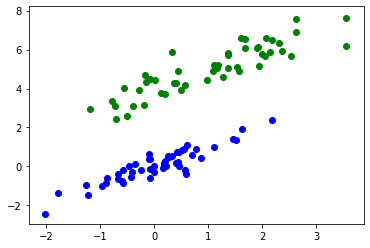

In [6]:
plt.scatter(clase_0[:,0], clase_0[:,1], color='b')
plt.scatter(clase_1[:,0], clase_1[:,1], color='g')

In [7]:
X = xi[:,[0,1]]
y = xi[:,2]

#print(X)
#print (y)

In [8]:
b = None
w = None
n_iters = 1000
lambda = 0.01
lr = 0.001
tenemos=fit(X, y)
 
print(w, b)

None None


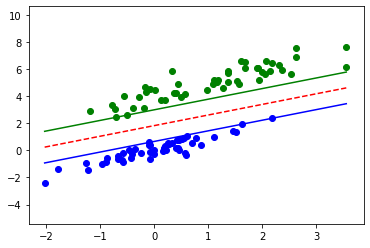

In [9]:
def visualize_svm():
     def grafica_hiperplano(x, wx, bx, offset):
          return (-wx[0] * x + bx + offset) / wx[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(clase_0[:,0], clase_0[:,1], color='b')
     plt.scatter(clase_1[:,0], clase_1[:,1], color='g')

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])
     w=tenemos["normal"]
     b=tenemos["alorig"]
        
#Hiperplano clasificador: 𝒘∙𝒙−b = 0
     x1_1 = grafica_hiperplano(x0_1, w, b, 0)
     x1_2 = grafica_hiperplano(x0_2, w, b, 0)
        
#Hiperplano: 𝒘∙𝒙−b = -1
     x1_1_m = grafica_hiperplano(x0_1, w, b, -1)
     x1_2_m = grafica_hiperplano(x0_2, w, b, -1)
        
#Hiperplano: 𝒘∙𝒙−b = 1
     x1_1_p = grafica_hiperplano(x0_1, w, b, 1)
     x1_2_p = grafica_hiperplano(x0_2, w, b, 1)
        
#Grafica hiperplanos
     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'r--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'g')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'b')


     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()